In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
#df.drop_duplicates(keep = False, inplace = True)

# Data Cleaning

In [8]:
df['review'] = df['review'].apply(lambda x:x.lower())

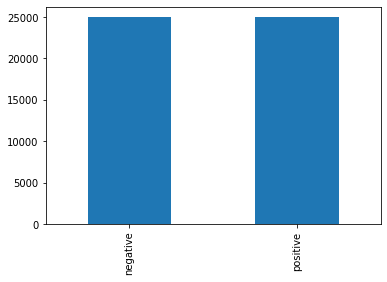

In [9]:
df['sentiment'].value_counts().plot(kind = 'bar')

In [10]:
def remove_html(text):
    soup = BeautifulSoup(text)
    html_free = soup.get_text()
    return html_free

In [11]:
df['review'] = df['review'].apply(remove_html)

In [12]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct
def remove_numbers(text):
    text = re.sub(r'[0-9]+', '', text)
    return text

In [13]:
df['review'] = df['review'].apply(remove_punctuation)
df['review'] = df['review'].apply(remove_numbers)

In [14]:
tokenizer = RegexpTokenizer(r'\w+')

In [15]:
df['review'] = df['review'].apply(lambda x:tokenizer.tokenize(x))

In [16]:
df.head()

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",positive
1,"[a, wonderful, little, production, the, filmin...",positive
2,"[i, thought, this, was, a, wonderful, way, to,...",positive
3,"[basically, theres, a, family, where, a, littl...",negative
4,"[petter, matteis, love, in, the, time, of, mon...",positive


In [17]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = [w for w in text if not w in stop_words]
    return words

In [18]:
df['review'] = df['review'].apply(remove_stopwords)

In [19]:
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [20]:
df['review'] = df['review'].apply(word_lemmatizer)

In [21]:
df.head()

,review,sentiment
0,"[one, reviewer, mentioned, watching, oz, episo...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, there, family, little, boy, jake, ...",negative
4,"[petter, matteis, love, time, money, visually,...",positive


In [22]:
def cleaned_text(text):
    clean_text = " ".join([w for w in text])
    return clean_text
    

In [23]:
df['review'] = df['review'].apply(cleaned_text)

In [24]:
le = LabelEncoder()
df.iloc[:, 1] = le.fit_transform(df.iloc[:, 1])

In [25]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


In [26]:
X = df.iloc[:, 0]
y = df.iloc[:, 1]

In [27]:
vec = TfidfVectorizer()

In [28]:
X_vec = vec.fit_transform(X)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_vec,y,train_size = 0.8)

# SVM Model

In [30]:
svc_model = LinearSVC()
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict(X_test)
print(accuracy_score(y_pred_svc,y_test))
print(confusion_matrix(y_test,y_pred_svc))
print(roc_auc_score(y_pred_svc,y_test))

0.8904
[[4438  586]
 [ 510 4466]]
0.8904671929315875


# Classification Report of SVC Model

In [31]:
svc_report = classification_report(y_test,y_pred_svc)
print(svc_report)


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5024
           1       0.88      0.90      0.89      4976

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

